# LENDING CLUB CASE STUDY

### IMPORT LIBRARIES REQUIRED

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


### IGNORE WARNINGS

In [8]:
import warnings
warnings.filterwarnings(action='ignore')

### IMPORT THE DATASET

In [10]:
# Reading the dataset
import pandas as pd  # Make sure to import pandas

data = pd.read_csv('loan.csv')

# Create a copy of the dataset
data_copy = data.copy()     

In [11]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## DATA CLEANUP

#### IDENTIFY COLUMNS WITH NULL VALUES

In [14]:
data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

#### REMOVE COLUMNS WITH NULL VALUES

In [16]:
data.dropna(axis = 1, how = 'all', inplace = True)

#### IDENTIFY AND REMOVE COLUMNS WITH ONLY SINGLE VALUES, AS THEY MAY NOT CONTRIBUTE TO ANALYSIS

In [18]:
# Identify columns with only one unique value
single_value_columns = data.columns[data.nunique() == 1]  

# Display the columns with single unique values
print("Columns with only a single unique value:")
print(single_value_columns)

Columns with only a single unique value:
Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')


In [19]:
# Remove single valued columns
data.drop(single_value_columns,axis = 1, inplace = True)

#### IDENTIFY DUPLICATES IN THE DATASET

In [21]:
row, column = data[data.duplicated()].shape
if row!=0:
    print(f'{row} rows have duplicate data')
else:
    print('No duplicates in the data')

No duplicates in the data


### DATA DICTIONARY OBSERVATIONS

* **"id" , 'member_id', 'url'** have only **unique** values.
* Other observations in **data dictionary**,
    * **title** - The loan title provided by the borrower.
    * **emp_title** - The job title supplied by the Borrower when applying for the loan.
    * **out_prncp_inv** - Remaining outstanding principal for portion of total amount funded by investors
    * **zip_code** - The first 3 numbers of the zip code provided by the borrower in the loan application.
    * **last_credit_pull_d** - The most recent month LC pulled credit for this loan.
    * **total_rec_late_fee** - Late fees received to date.
    * **delinq_2yrs** - The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years.
    * **last_pymnt_d** - Last month payment was received.
    * **revol_bal** - Total credit revolving balance.
    * **out_prncp** - Remaining outstanding principal for total amount funded.
    * **total_pymnt** - Payments received to date for total amount funded.
    * **total_rec_int** - Interest received to date.
    * **total_rec_prncp** - Principal received to date.    
    * **recoveries** - post charge off gross recovery.
    * **last_pymnt_amnt** - Last total payment amount received. 
    * **collection_recovery_fee** - post charge off collection fee.
    * **earliest_cr_line** - The month the borrower's earliest reported credit line was opened.
    * **addr_state** - Average current balance of all accounts
    * **desc** - Loan description provided by the borrower
    * **mths_since_last_delinq** - The number of months since the borrower's last delinquency
    * **mths_since_last_record** - The number of months since the last public record.
    * **next_pymnt_d** - Next scheduled payment date
    * **pub_rec_bankruptcies** - Number of public record bankruptcies
    * **pub_rec** - Number of derogatory public records
* The **above columns have no contributions** to analysis as they are either **derived post-approval** of loan or contain only unique values   or do not contribute to the analysis.


We shall **remove the above columns** 

In [26]:
del_col_list = ['id', 'member_id', 'url', 'title', 'emp_title', 'out_prncp_inv', 'zip_code', 'last_credit_pull_d', 
           'total_rec_late_fee', 'delinq_2yrs', 'last_pymnt_d', 'revol_bal', 
           'out_prncp', 'total_pymnt', 'total_rec_int', 'total_rec_prncp', 'collection_recovery_fee', 
           'last_pymnt_amnt','recoveries','earliest_cr_line', 'addr_state','desc','mths_since_last_delinq','mths_since_last_record',
               'next_pymnt_d','pub_rec_bankruptcies','pub_rec']
data.drop(del_col_list,axis = 1, inplace = True)

### NUMBER OF ROWS AND COLUMNS IN DATASET

In [28]:
# To find the number of rows and columns
rows, columns = data.shape
print('Rows',rows,'Columns',columns)

Rows 39717 Columns 21


In [30]:
# To display maximum rows and columns which are 21 currently
pd.set_option('display.max_columns', 21)  
pd.set_option('display.max_rows', 21) 

In [33]:
data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'inq_last_6mths', 'open_acc', 'revol_util',
       'total_acc', 'total_pymnt_inv'],
      dtype='object')

### Identify Missing Values

In [38]:
(data.isnull().sum()/len(data.index))*100

loan_amnt              0.000000
funded_amnt            0.000000
funded_amnt_inv        0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_length             2.706650
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            0.000000
purpose                0.000000
dti                    0.000000
inq_last_6mths         0.000000
open_acc               0.000000
revol_util             0.125891
total_acc              0.000000
total_pymnt_inv        0.000000
dtype: float64

#### Missing Value Treatment
- Missing Values found for emp_lenght and revol_util
- emp_lenght is categorical in nature, we can replace nulls with mode
- The percentage of records with  missing values is very less so we can drop them for revol_util

In [45]:
data.emp_length.fillna(data.emp_length.mode()[0], inplace = True)
data.dropna(axis = 0, subset = ['revol_util'] , inplace = True)


In [48]:
(data.isnull().sum()/len(data.index))*100

loan_amnt              0.0
funded_amnt            0.0
funded_amnt_inv        0.0
term                   0.0
int_rate               0.0
installment            0.0
grade                  0.0
sub_grade              0.0
emp_length             0.0
home_ownership         0.0
annual_inc             0.0
verification_status    0.0
issue_d                0.0
loan_status            0.0
purpose                0.0
dti                    0.0
inq_last_6mths         0.0
open_acc               0.0
revol_util             0.0
total_acc              0.0
total_pymnt_inv        0.0
dtype: float64

In [50]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,inq_last_6mths,open_acc,revol_util,total_acc,total_pymnt_inv
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,1,3,83.70%,9,5833.84
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,5,3,9.40%,4,1008.71
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,2,2,98.50%,10,3005.67
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,1,10,21%,37,12231.89
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,17.94,0,15,53.90%,38,3513.33


#### Data format correction

In [53]:
# Remove % suffix from revol_util and int_rate and convert them into numerica data types
data.revol_util = pd.to_numeric(data.revol_util.apply(lambda x : x.split('%')[0]))
data.int_rate = pd.to_numeric(data.int_rate.apply(lambda x : x.split('%')[0]))

#### INITIAL TARGET VARIABLE ANALYSIS (LOAN STATUS)

In [56]:
data.loan_status.value_counts()

loan_status
Fully Paid     32916
Charged Off     5611
Current         1140
Name: count, dtype: int64

In [58]:
(data.loan_status.value_counts()/len(data.loan_status))*100

loan_status
Fully Paid     82.980815
Charged Off    14.145259
Current         2.873925
Name: count, dtype: float64

### Observations on loan status
- 82% of loans are fully paid
- 14% are charged Off
- Only 3% are current loans

<Axes: xlabel='loan_status', ylabel='count'>

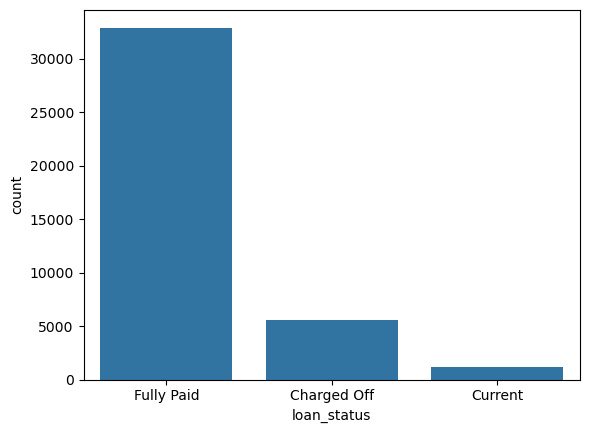

In [61]:
sns.countplot(x = 'loan_status', data = data)

#### Loan status with value 'Current' does not contribute to analysis, so we can remove it

In [63]:
data_bk_latest = data.copy()
data = data[data.loan_status != 'Current']

In [66]:
data.loan_status.value_counts()

loan_status
Fully Paid     32916
Charged Off     5611
Name: count, dtype: int64

### UNIVARIATE ANALYSIS


#### ANNUAL INCOME

<Axes: xlabel='annual_inc'>

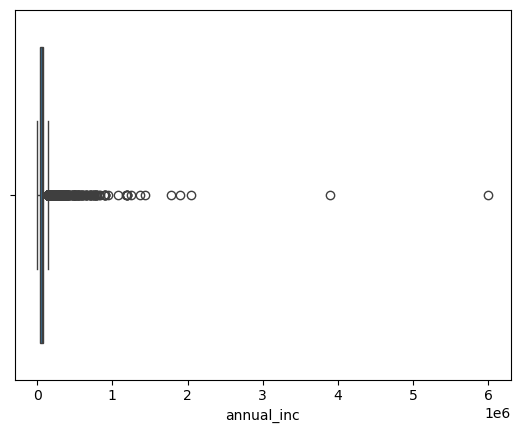

In [70]:
# Create a box plot to identify if there are outliers
sns.boxplot(x=data['annual_inc']) 

#### It's clearly visible, that there are some outliers which are distorting the overall analysis, lets remove them


In [73]:
quantile_info = data.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50     59000.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234000.0
Name: annual_inc, dtype: float64

In [75]:
data.annual_inc.max()

6000000.0

#### As the max annual income value is 60,00,000 and the 99 percentile value is 2,34,997, and there is still signficant increase in salary from 98 percentile to 99 percentile, so we can keep values below 99 percentile to remove the outliers

In [78]:
data_bk_latest = data.copy()
annual_inc_99_perc = data['annual_inc'].quantile(0.99)
data = data[data.annual_inc < annual_inc_99_perc]

<Axes: xlabel='annual_inc'>

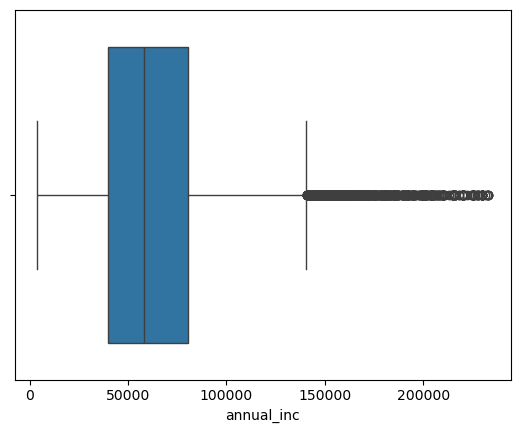

In [80]:
# Draw the box plot again to check if outliers are removed
sns.boxplot(x=data['annual_inc']) 

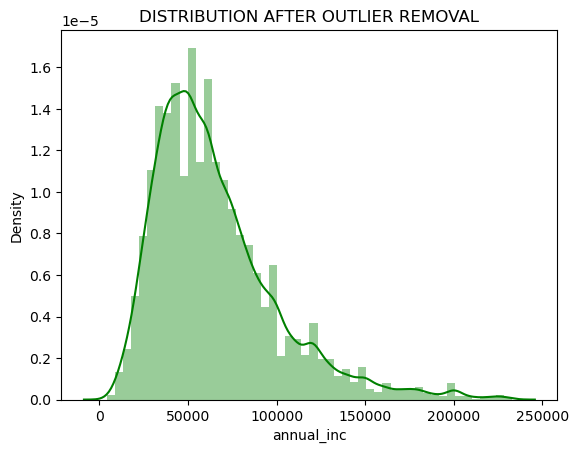

In [82]:
# Dist plot to affirm outlier removal
sns.distplot(data['annual_inc'], color='green')
plt.title('DISTRIBUTION AFTER OUTLIER REMOVAL')
plt.show()

#### OBSERVATION : Annual Income had huge outliers which are now removed

#### LOAN AMOUNT

<Axes: xlabel='loan_amnt'>

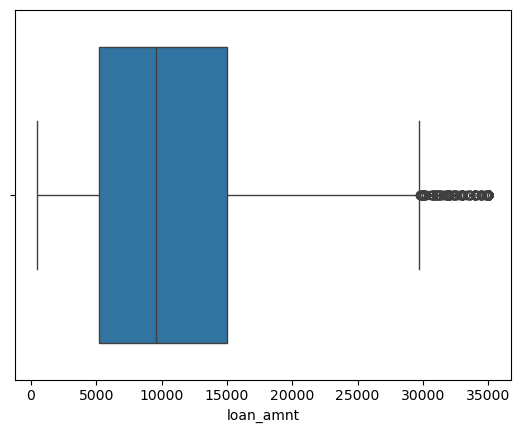

In [85]:
sns.boxplot(x=data.loan_amnt)

In [87]:
data.loan_amnt.quantile([0.75,0.90,0.95,0.97, 0.98, 0.99, 1.0])

0.75    15000.0
0.90    21000.0
0.95    25000.0
0.97    28000.0
0.98    30000.0
0.99    35000.0
1.00    35000.0
Name: loan_amnt, dtype: float64

#### OBSERVATION : Loan amount seems to have continuous values and outlier removal is not necesssary

#### FUND AMOUNT

<Axes: xlabel='funded_amnt'>

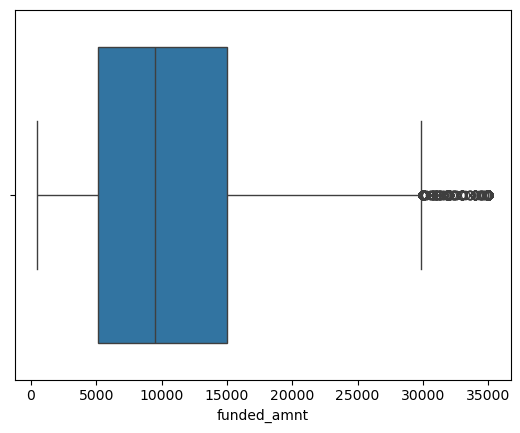

In [90]:
sns.boxplot(x=data.funded_amnt)

In [92]:
data.funded_amnt.quantile([0.75,0.90,0.95,0.97, 0.98, 0.99, 1.0])

0.75    15000.00
0.90    20000.00
0.95    25000.00
0.97    25966.75
0.98    30000.00
0.99    35000.00
1.00    35000.00
Name: funded_amnt, dtype: float64

#### OBSERVATION : Fund amount seems to have continuous values and outlier removal is not necesssary

#### INTEREST RATE

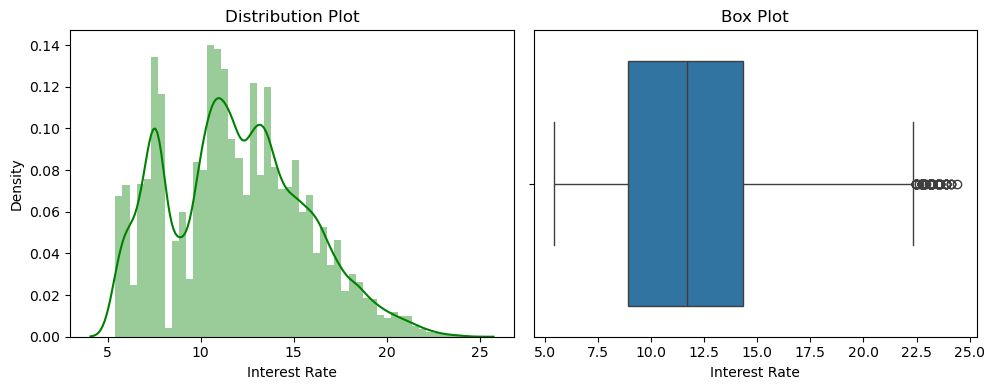

In [125]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
# Plot the distplot on the first subplot
sns.distplot(x=data.int_rate, color='green',kde=True, ax=axes[0])
axes[0].set_title("Distribution Plot")
axes[0].set_xlabel("Interest Rate")

# Plot the boxplot on the second subplot
sns.boxplot(x=data.int_rate, ax=axes[1], orient="h")
axes[1].set_title("Box Plot")
axes[1].set_xlabel("Interest Rate")

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

#### OBSERVATION : 
- The average interest rate is 12%, post 75 percentile the interest rate increases greatly
- Most of the borrowers prefer to get loan at interest rate ranging between 9% to 14%

### PURPOSE

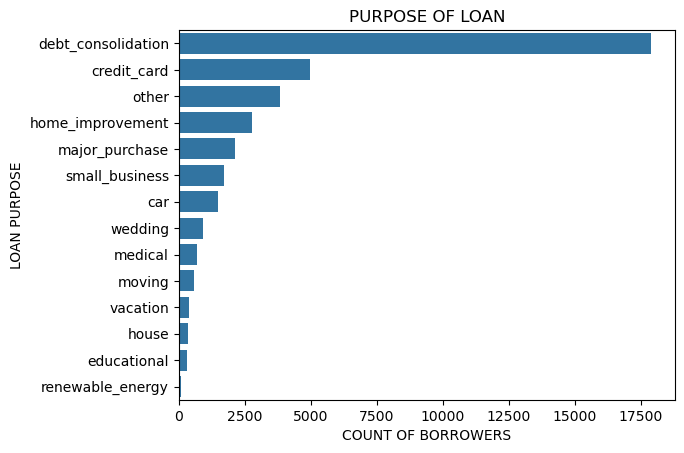

In [140]:
sns.countplot(y=data['purpose'], 
                    order=data['purpose'].value_counts().index)
plt.title('PURPOSE OF LOAN')
plt.ylabel('LOAN PURPOSE')
plt.xlabel('COUNT OF BORROWERS')   
plt.show()

#### OBSERVATION : Most of the borrowers are taking loans for debt consolidation and credit card bill payment

### HOME OWNERSHIP

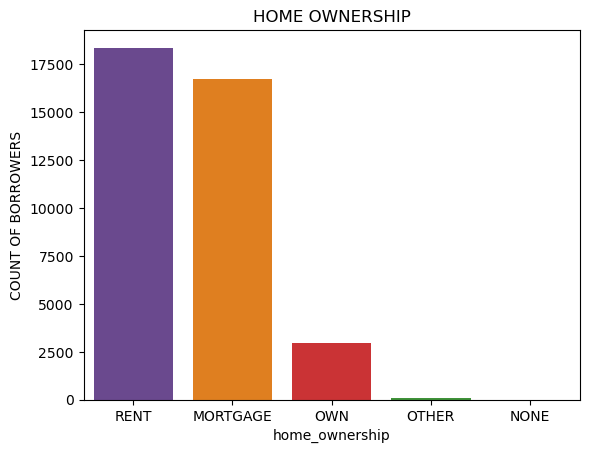

In [152]:
sns.countplot(x=data['home_ownership'], 
                    order=data['home_ownership'].value_counts().index,palette='Paired_r')
plt.title('HOME OWNERSHIP')
plt.ylabel('COUNT OF BORROWERS')
plt.show()

#### OBSERVATION - The percentage of Borrowers owning a house is very less

### OBSERVATION SUMMARY - UNIVARIATE ANALYSIS
* Annual Income had outliers in the upper fence which were removed.
* There was a huge jump between 99 and 100 % of data in Annual Income and this was removed.
* The average interest rate is 12% but there is huge jump after 75 percentile.
* Most of the borrowers get interest rate between 9% to 14%.
* Most of the loans are taken for debt consolidation and credit card bill payment.
* Very less percentage of borrowers have their own house
* Outlier presence was not impacting the fund amount and loan amount